## tensorflow를 이용한 예제

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


#### 모듈에러시 conda install keras

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
np.random.seed(3)
tf.random.set_seed(3)

In [5]:
Data_set = np.loadtxt('./console.csv',delimiter=',')
Data_set

array([[ 2., 81.],
       [ 4., 93.],
       [ 6., 91.],
       [ 8., 97.]])

In [6]:
x = [i[0] for i in Data_set]
x

[2.0, 4.0, 6.0, 8.0]

In [7]:
y = [i[1] for i in Data_set]
y

[81.0, 93.0, 91.0, 97.0]

In [8]:
model = Sequential()
model.add(Dense(1,input_dim=1,activation='linear'))

In [15]:
sgd = optimizers.SGD(lr=0.01)
model.compile(loss = 'mean_squared_error',optimizer=sgd, metrics=['mse'])
early_stopping = EarlyStopping() # 과적합방지
model.fit(x,y,epochs=100, batch_size=1, shuffle=False, # epochs를 수정함 ex=800
         callbacks=[early_stopping])

Train on 4 samples
Epoch 1/100
4/4 [==============================] - 0s 60ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 2/100
4/4 [==============================] - 0s 3ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 3/100
4/4 [==============================] - 0s 3ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 4/100
4/4 [==============================] - 0s 3ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 5/100
4/4 [==============================] - 0s 3ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 6/100
4/4 [==============================] - 0s 3ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 7/100
4/4 [==============================] - 0s 3ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 8/100
4/4 [==============================] - 0s 3ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 9/100
4/4 [==============================] - 0s 2ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 10/100
4/4 [==============================] - 0s 3ms/sample - loss: 12.3318 - mse: 12.3318
Epoch 11/100
4/4 [=

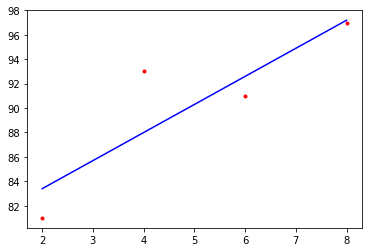

In [17]:
import matplotlib.pyplot as plt
plt.plot(x,model.predict(x),'blue',x,y,'r.')
plt.show()

In [18]:
#공식으로 구한 W와 B출력
model.layers[0].get_weights()

[array([[2.3000648]], dtype=float32), array([78.79379], dtype=float32)]

In [19]:
w = model.layers[0].get_weights()[0][0]
w

array([2.3000648], dtype=float32)

In [20]:
b = model.layers[0].get_weights()[1][0]
b

78.79379

In [21]:
print(f'2시간 공부하였을 때 예상점수 : {w*2 + b}')
print(f'4시간 공부하였을 때 예상점수 : {w*4 + b}')

2시간 공부하였을 때 예상점수 : [83.39392]
4시간 공부하였을 때 예상점수 : [87.99405]


In [22]:
pred = model.predict([4])
pred

array([[87.99405]], dtype=float32)